In [1]:
%matplotlib inline
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from pandas_datareader import data, wb

import os
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

path1 = os.path.join(os.getcwd(),'style-table.css')
path2 = os.path.join(os.getcwd(),'style-notebook.css')

css = open(path1).read() + open(path2).read()
HTML('<style>{}</style>'.format(css))

In [9]:
# http://stanford.edu/~mwaskom/software/seaborn/examples/index.html

# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks.
# line_kws={"color":"grey","alpha":0.1,"linewidth":0}

### histograms with matplotlib

(array([  4.,   6.,   9.,  18.,  20.,  17.,   9.,  10.,   4.,   3.]),
 array([-2.21705335, -1.75129382, -1.28553429, -0.81977476, -0.35401523,
         0.1117443 ,  0.57750383,  1.04326336,  1.50902289,  1.97478242,
         2.44054195]),
 <a list of 10 Patch objects>)

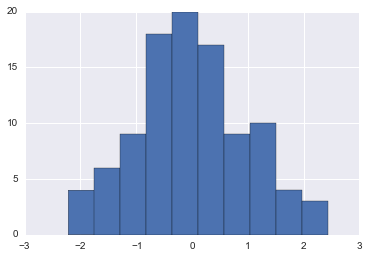

In [10]:
# make a numpy array of 100 datapoints
# plot array as a histogram
# 10 bins is the default number for plt.hist()
# this is the basic histogram

dataset1 = np.random.randn(100)
plt.hist(dataset1)

(array([  6.,  17.,  32.,  18.,   7.]),
 array([-2.45521   , -1.48803401, -0.52085802,  0.44631796,  1.41349395,
         2.38066994]),
 <a list of 5 Patch objects>)

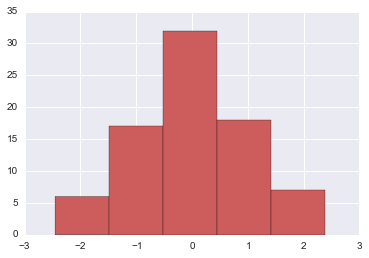

In [16]:
# make a numpy array of 80 datapoints
# plot array as a histogram, in red
# use 5 bins

dataset2 = np.random.randn(80)

plt.hist(dataset2,color='indianred',bins=5)

(array([ 0.0516969,  0.0516969,  0.       ,  0.2067876,  0.0516969,
         0.1033938,  0.3101814,  0.4135752,  0.3101814,  0.4652721,
         0.4652721,  0.4135752,  0.3101814,  0.3618783,  0.1033938,
         0.1550907,  0.0516969,  0.2067876,  0.0516969,  0.0516969]),
 array([-2.45521   , -2.213416  , -1.97162201, -1.72982801, -1.48803401,
        -1.24624001, -1.00444602, -0.76265202, -0.52085802, -0.27906403,
        -0.03727003,  0.20452397,  0.44631796,  0.68811196,  0.92990596,
         1.17169995,  1.41349395,  1.65528795,  1.89708195,  2.13887594,
         2.38066994]),
 <a list of 20 Patch objects>)

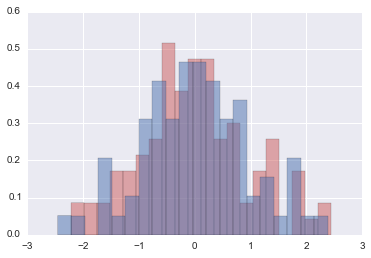

In [18]:
# plot both dataset1 and dataset2 in the same plot (overlap)
# overlap is transparent due to alpha=0.5
# be sure to use normed=True if dataset point count differs

plt.hist(dataset1,normed=True,color='indianred',
         alpha=0.5,bins=20)

plt.hist(dataset2,normed=True,
         alpha=0.5,bins=20)

### histograms with seaborn

In [21]:
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

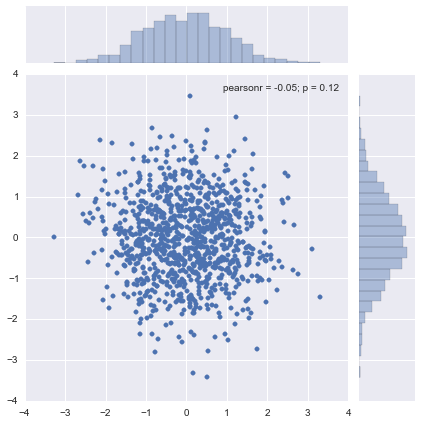

In [22]:
sns.jointplot(data1,data2)

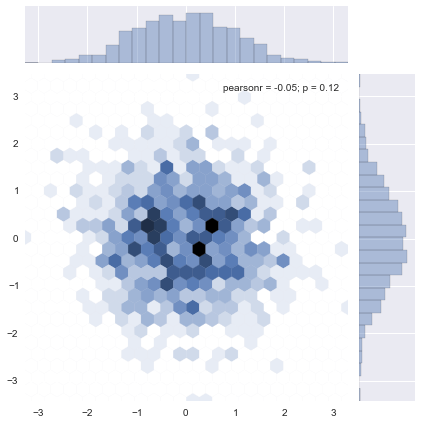

In [23]:
# easier to read using hex bins

sns.jointplot(data1,data2,kind='hex')

### distplot (combined plot) with seaborn

In [27]:
dataset3 = np.random.randn(100)

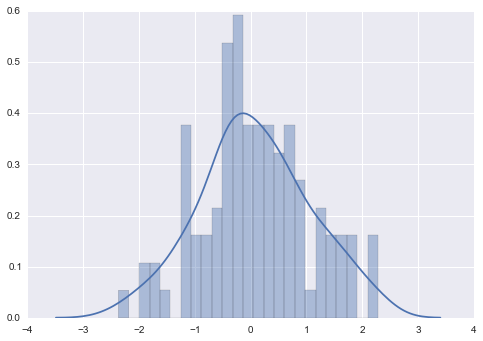

In [28]:
sns.distplot(dataset3,bins=25)

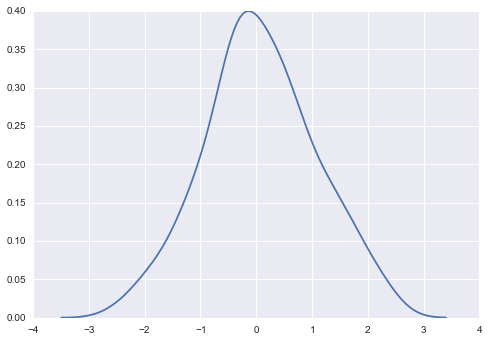

In [29]:
# take away the histogram

sns.distplot(dataset3,bins=25,hist=False)

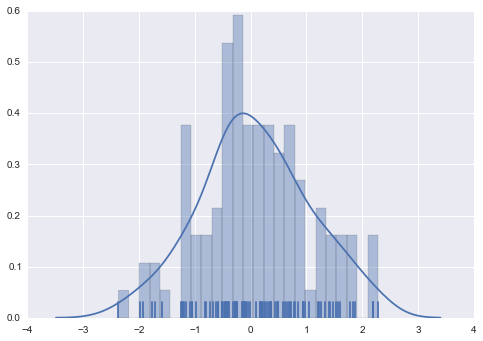

In [30]:
# add rug

sns.distplot(dataset3,bins=25,rug=True)

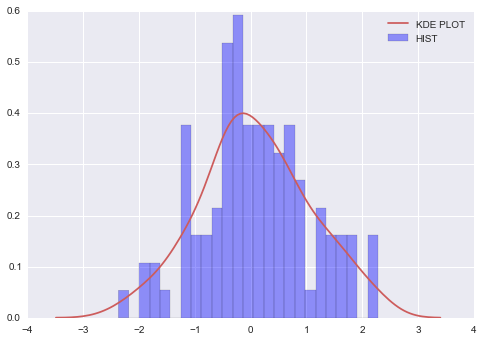

In [31]:
# pass arguments for specific plots through a dictionary

sns.distplot(dataset3,bins=25,
             kde_kws={'color':'indianred',
                      'label':'KDE PLOT'},
            hist_kws={'color':'blue',
                     'label':'HIST'})

In [32]:
ser1 = pd.Series(dataset3,name='My_Data')
ser1.head()

0    1.609721
1   -1.235305
2   -0.504482
3    0.772147
4    0.358008
Name: My_Data, dtype: float64

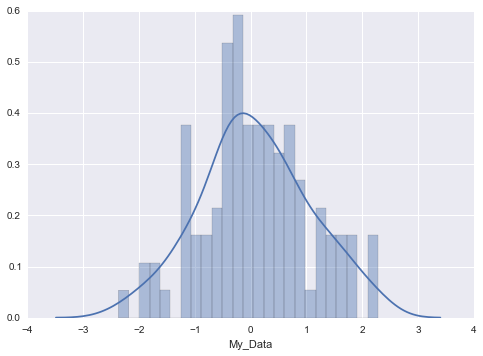

In [33]:
sns.distplot(ser1,bins=25)

### boxplots with seaborn

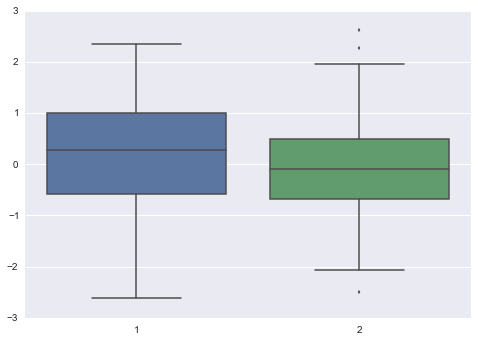

In [35]:
data1 = np.random.randn(100)
data2 = np.random.randn(100)

sns.boxplot([data1,data2])

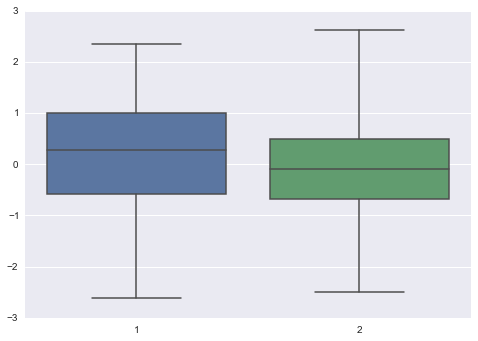

In [36]:
# include outliers, set whis to np.inf

sns.boxplot([data1,data2],whis=np.inf)

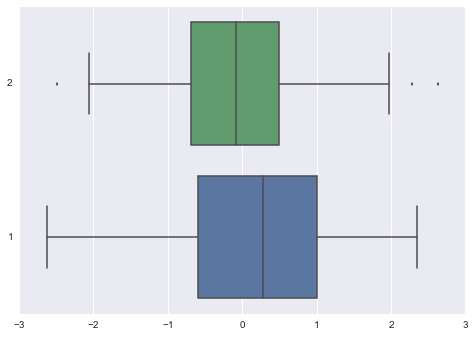

In [37]:
# horizontal boxplots

sns.boxplot([data1,data2],vert=False)

### violin plots with seaborn

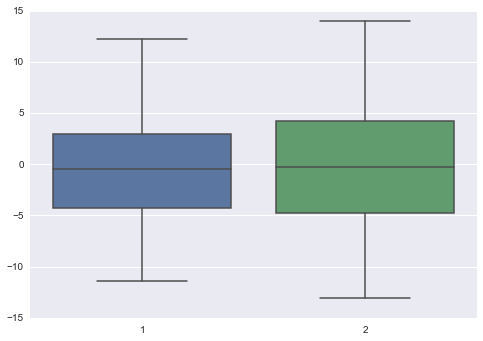

In [41]:
# example of a boxplot being insufficient

data1 = scipy.stats.norm(0,5).rvs(100)

# two gamma distributions, concatenated together

data2 = np.concatenate([scipy.stats.gamma(5).rvs(50)-1,
                       scipy.stats.gamma(5).rvs(50)*(-1)])

sns.boxplot([data1,data2],whis=np.inf)

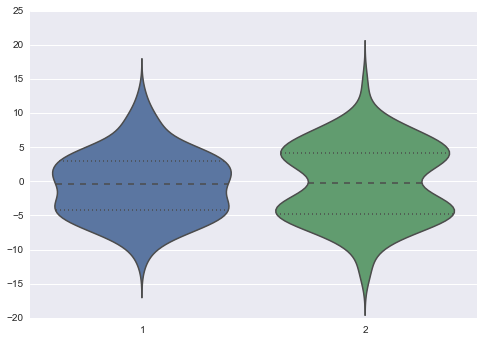

In [42]:
# you can compare the 2 datasets better here

sns.violinplot([data1,data2])

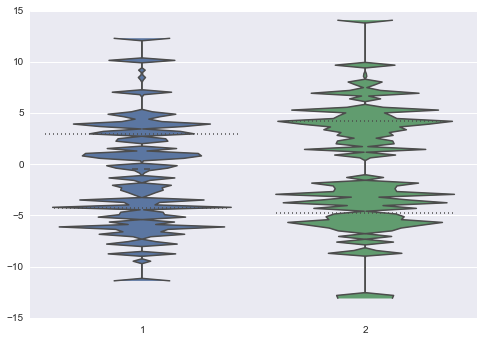

In [43]:
# define bandwidth
sns.violinplot([data1,data2],bw=0.01)

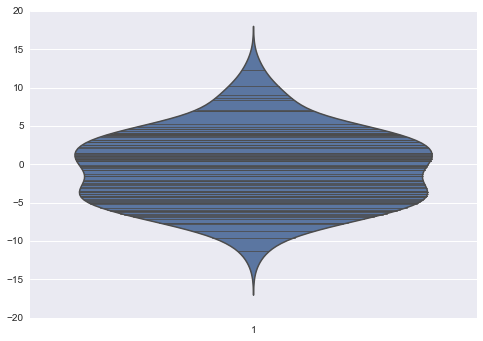

In [44]:
# all lines are individual datapoints
# like a rugplot + violinplot in one
sns.violinplot(data1,inner='stick')

### kernel density estimation plots with seaborn

In [3]:
dataset = np.random.randn(25)

(0, 1)

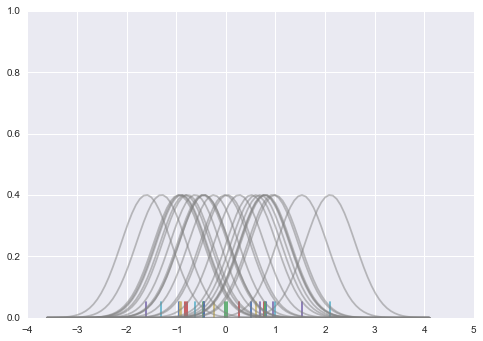

In [8]:
# manual implementation, part 1

sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    
    kernel = scipy.stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)    

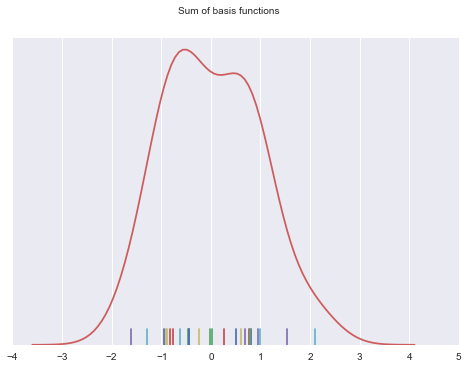

In [9]:
# manual implementation, part 2

sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of basis functions')

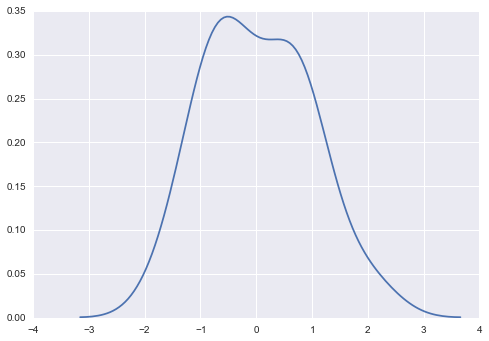

In [13]:
# seaborn way part 1, much shorter

sns.kdeplot(dataset)

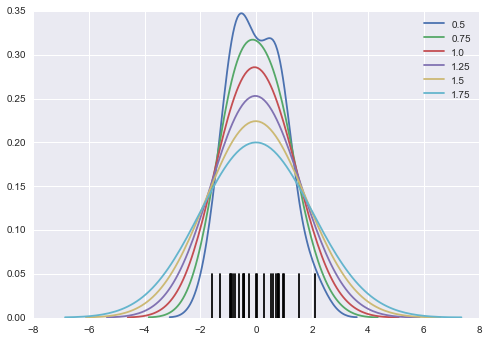

In [14]:
# seaborn way part 2, much shorter

sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

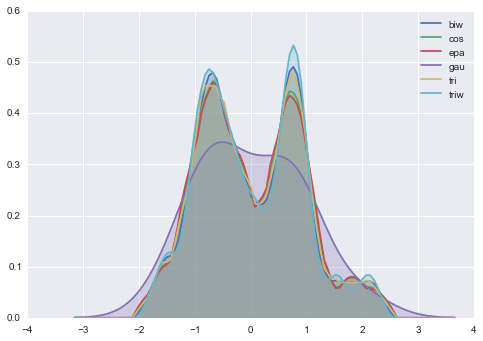

In [16]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

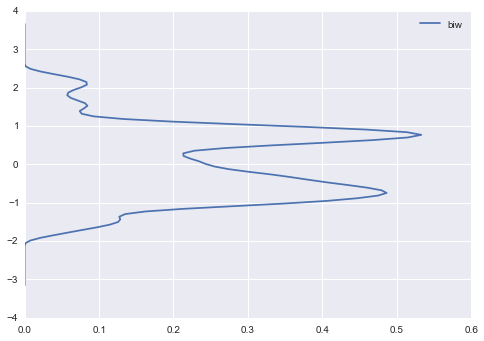

In [17]:
sns.kdeplot(dataset,kernel=kern,label='biw',vertical=True)

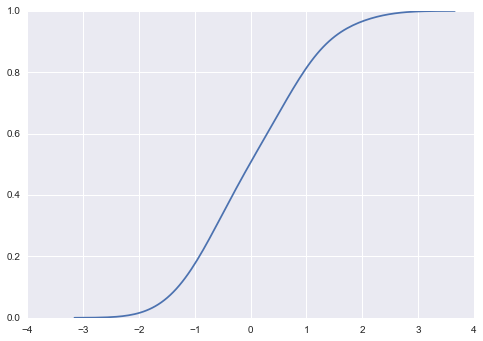

In [18]:
# cumulative distribution function

sns.kdeplot(dataset,cumulative=True)

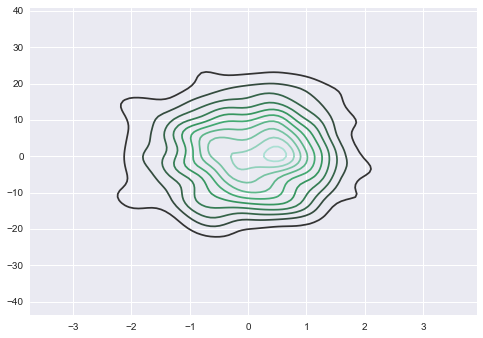

In [2]:
# kde plots for multivariate density estimation
# use seaborn in sync with pandas here

mean = [0,0]
cov = ([1,0],[0,100])
dataset2 = np.random.multivariate_normal(mean,cov,1000)

df = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(df)

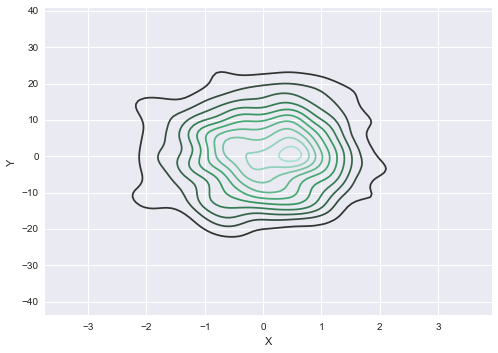

In [3]:
# same thing as above, different notation
sns.kdeplot(df.X,df.Y)

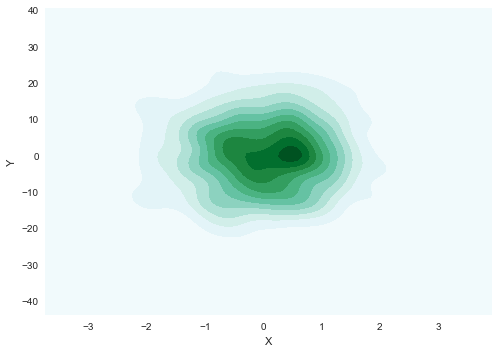

In [4]:
sns.kdeplot(df.X,df.Y,shade=True)

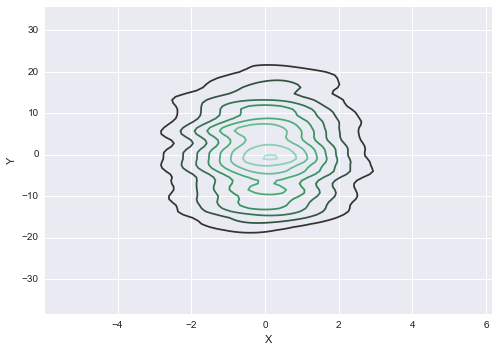

In [5]:
# set bandwidth
sns.kdeplot(df.X,df.Y,bw=1)

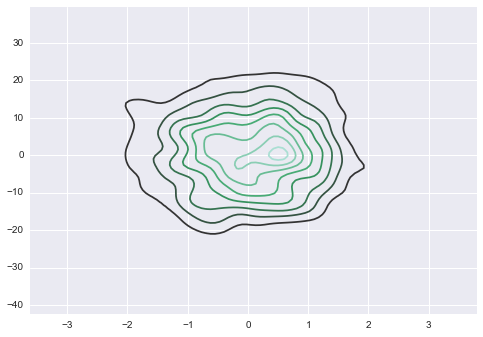

In [6]:
# silverman's estimation bandwidth
sns.kdeplot(df,bw='silverman')

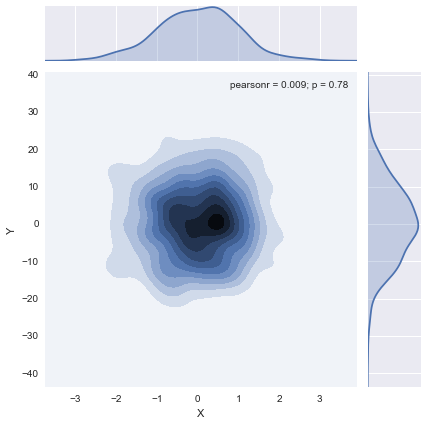

In [10]:
# kde joint plot
sns.jointplot('X','Y',df,kind='kde')